# IPND Data Analyst Final Project by bjemcnally version 1.0

## Using the most recent baseball stats data available here:
http://www.seanlahman.com/baseball-archive/statistics/


## I pose and attempt to answer the following questions:
1. What was the highest number of HRs hit across both leagues in each year? 
2. Since the implementation of the designated hitter (DH) in the American League (AL), have AL teams scored more runs than National League teams (total runs scored or team average)?
3. Are NL pitchers better hitters than AL pitchers?
4. Does a teams record correlate with their payroll? Looking specifically at SF Giants and LA Dodgers since 1985.
5. How many Giants have appeared in All Star games?

## Please note that all results are tentative!

# Question 1: What was the highest number of HRs hit across both leagues in each year?

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

batting_df = pd.read_csv('baseball/core/Batting.csv')

In [256]:
batting_group_year = batting_df.groupby(['yearID'])

In [257]:
max_HR_by_year = batting_group_year.max()['HR']

In [258]:
years = batting_df['yearID'].drop_duplicates()

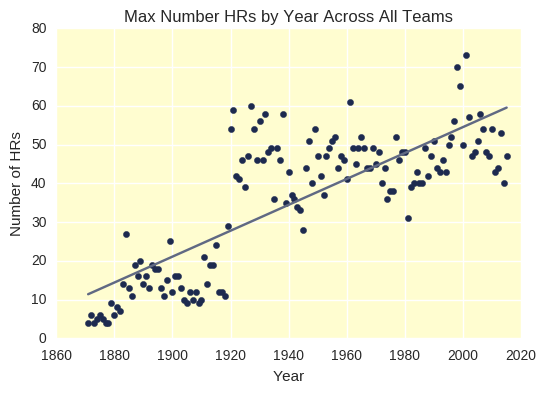

In [259]:
import seaborn as sns
%matplotlib inline

x = years
y = max_HR_by_year

plt.scatter(x, y, color = '#1d2a4f', label='Max HRs')

plt.title('Max Number HRs by Year Across All Teams')
plt.xlabel('Year')
plt.ylabel('Number of HRs')
plt.xlim(1860, 2020)
plt.ylim(0, 80)
# plt.xticks(10)

# add trendline

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', color = '#1d2a4f')
plt.plot(x, m*x + b, '-', color = '#606983')

### Results and Discussion

The annual high in number of HRs hit by a single individual has obviously dramatically since the beginning of baseball. The 'Steroid Era' is thought to correspond to the late 1980's through early 2000's which appears to correlate with a peak in these data, or at least the three highest data points. Highest # hit by XXX in XXX.

## This figure shows maximum of number of homeruns (HR) hit league-wide for each year (blue). Compare this to the average of the maximum number by team for each year (i.e. find each team's max for each year and then average them by year, red). Both clearly show a steady increase over time.

# does the data differ between the two leagues since the DH was implemented (1973-present)? more specifically, have AL teams scored more runs than NL teams?
On February 2, 1876, the National League of Professional Baseball Clubs, which comes to be more commonly known as the National League (NL), is formed. The American League (AL) was established in 1901 and in 1903, the first World Series was held.

http://www.huffingtonpost.com/quora/what-are-the-major-eras-o_b_3547814.html

In [24]:
DH_implemented = 1973 # DH = designated hitter
batting_since_DH = batting_df[batting_df.yearID >= DH_implemented]

In [25]:
AL_batting_since_DH = batting_since_DH[batting_since_DH.lgID == 'AL']

In [26]:
NL_batting_since_DH = batting_since_DH[batting_since_DH.lgID == 'NL']

In [27]:
AL_batting_since_DH_tot_runs_by_year = AL_batting_since_DH.groupby('yearID').sum()['R']

In [28]:
AL_batting_since_DH_mean_runs_by_year = AL_batting_since_DH.groupby('yearID').mean()['R']

In [29]:
NL_batting_since_DH_tot_runs_by_year = NL_batting_since_DH.groupby('yearID').sum()['R']

In [30]:
NL_batting_since_DH_mean_runs_by_year = NL_batting_since_DH.groupby('yearID').mean()['R']

In [31]:
DH_years = batting_since_DH['yearID'].drop_duplicates()

(1970, 2020)

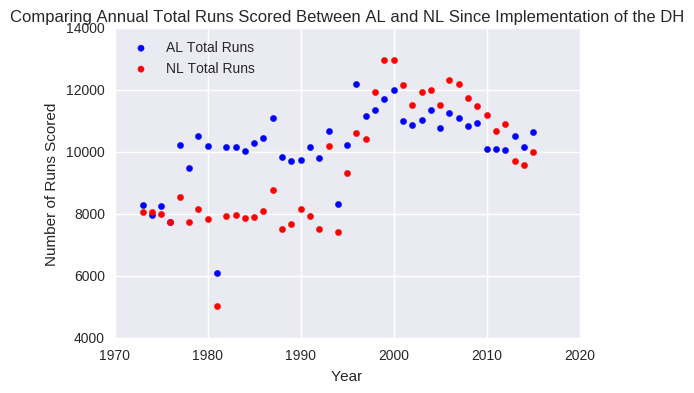

In [32]:
%matplotlib inline

x = DH_years
y1 = AL_batting_since_DH_tot_runs_by_year
y3 = NL_batting_since_DH_tot_runs_by_year

plt.scatter(x, y1, color = 'blue', label='AL Total Runs')
plt.scatter(x, y3, color = 'red', label='NL Total Runs')

plt.title('Comparing Annual Total Runs Scored Between AL and NL Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper left')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

(1970, 2020)

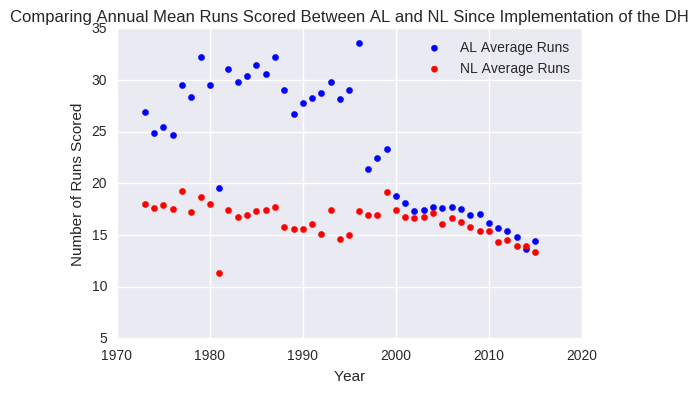

In [33]:
%matplotlib inline

x = DH_years
y2 = AL_batting_since_DH_mean_runs_by_year
y4 = NL_batting_since_DH_mean_runs_by_year

plt.scatter(x, y2, color = 'blue', label='AL Average Runs')

plt.scatter(x, y4, color = 'red', label='NL Average Runs')

plt.title('Comparing Annual Mean Runs Scored Between AL and NL Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper right')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

In [239]:
NL_batting_since_DH_mean_runs_by_year_and_team = NL_batting_since_DH.groupby(['yearID','teamID'])

In [240]:
NL_tot_runs_per_team = NL_batting_since_DH_mean_runs_by_year_and_team.sum()['R']

In [241]:
def find_mean_by_series_index(series_name, index_start, index_end):
    """Takes in a Series and averages all values with the same index"""
    start = index_start
    list_of_averages = []
    while start <= index_end:
        index_average = series_name[start].mean()
        start += 1
        list_of_averages.append(index_average)
    return list_of_averages

In [242]:
NL_avg_runs_per_year = find_mean_by_series_index(NL_tot_runs_per_team, 1973, 2015)

In [243]:
AL_batting_since_DH_mean_runs_by_year_and_team = AL_batting_since_DH.groupby(['yearID','teamID'])

In [244]:
AL_tot_runs_per_team = AL_batting_since_DH_mean_runs_by_year_and_team.sum()['R']

In [245]:
AL_avg_runs_per_year = find_mean_by_series_index(AL_tot_runs_per_team, 1973, 2015)

(1970, 2020)

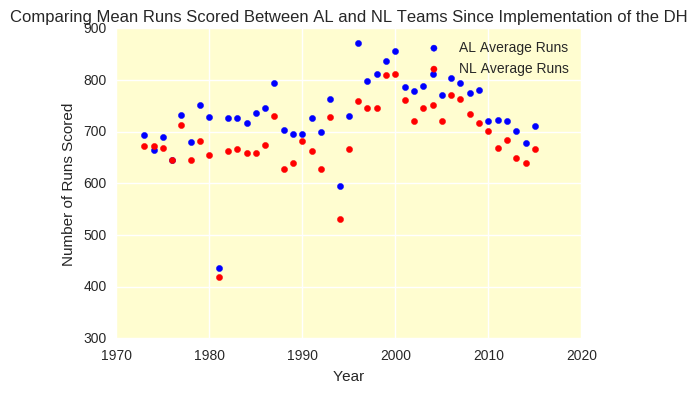

In [246]:
%matplotlib inline

x = DH_years
y2 = AL_avg_runs_per_year
y4 = NL_avg_runs_per_year

plt.scatter(x, y2, color = 'blue', label='AL Average Runs')

plt.scatter(x, y4, color = 'red', label='NL Average Runs')

plt.title('Comparing Mean Runs Scored Between AL and NL Teams Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper right')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

## are NL pitchers better hitters than AL pitchers? ('Pitchers Who Rake') **since DH**

In [60]:
# need to import position data from fielding table
fielding_df = pd.read_csv('baseball/core/Fielding.csv')

In [61]:
pitcher_fielding = fielding_df[fielding_df.POS == 'P']

In [62]:
pitcher_fielding_since_DH = pitcher_fielding[pitcher_fielding.yearID >= DH_implemented]

In [63]:
just_pitcher_pos_data = pitcher_fielding_since_DH.loc[:,['playerID', 'POS']]

In [64]:
# merge pitcher info with batting, retain only pitcher data
pitcher_batting_since_DH = just_pitcher_pos_data.merge(batting_since_DH, on = 'playerID', how = 'outer')

In [65]:
# probably best to look at H/AB or RBI/AB?
NL_pitcher_batting_since_DH = pitcher_batting_since_DH[pitcher_batting_since_DH.lgID == 'NL']

In [66]:
AL_pitcher_batting_since_DH = pitcher_batting_since_DH[pitcher_batting_since_DH.lgID == 'AL']

In [67]:
# hits per at bat
NL_hits_per_at_bat = NL_pitcher_batting_since_DH.loc[:,'H'] / NL_pitcher_batting_since_DH.loc[:,'AB']

In [68]:
print NL_hits_per_at_bat.mean()

0.145188868259


In [69]:
AL_hits_per_at_bat = AL_pitcher_batting_since_DH.loc[:,'H'] / AL_pitcher_batting_since_DH.loc[:,'AB']

In [70]:
print AL_hits_per_at_bat.mean()

0.165535217627


In [71]:
# HR per AB
NL_HR_per_at_bat = NL_pitcher_batting_since_DH.loc[:,'HR'] / NL_pitcher_batting_since_DH.loc[:,'AB']

In [72]:
print NL_HR_per_at_bat.mean()

0.00601823980303


In [73]:
AL_HR_per_at_bat = AL_pitcher_batting_since_DH.loc[:,'HR'] / AL_pitcher_batting_since_DH.loc[:,'AB']

In [74]:
print AL_HR_per_at_bat.mean()

0.0117126983227


## does payroll correlate with win record? e.x. Giants vs Dodgers, last 30 years (1985-2015)

In [76]:
# need to import salary data
salaries_df = pd.read_csv('baseball/core/Salaries.csv')

In [79]:
salaries_df.shape

(25575, 5)

In [99]:
SFN_salaries = salaries_df[salaries_df.teamID == 'SFN']

In [104]:
LAN_salaries = salaries_df[salaries_df.teamID == 'LAN']

In [105]:
SFN_payroll_by_year = SFN_salaries.groupby('yearID').sum()

In [106]:
LAN_payroll_by_year = LAN_salaries.groupby('yearID').sum()

In [110]:
# need annual record data from Teams table
teams_df = pd.read_csv('baseball/core/Teams.csv')

In [111]:
SFN_teams = teams_df[teams_df.teamID == 'SFN']

In [112]:
SFN_teams_since_1985 = SFN_teams[SFN_teams.yearID >= 1985]

In [124]:
SFN_record_since_1985 = SFN_teams_since_1985['W'] / SFN_teams_since_1985['G']

In [122]:
LAN_teams = teams_df[teams_df.teamID == 'LAN']

In [123]:
LAN_teams_since_1985 = LAN_teams[LAN_teams.yearID >= 1985]

In [125]:
LAN_record_since_1985 = LAN_teams_since_1985['W'] / LAN_teams_since_1985['G']

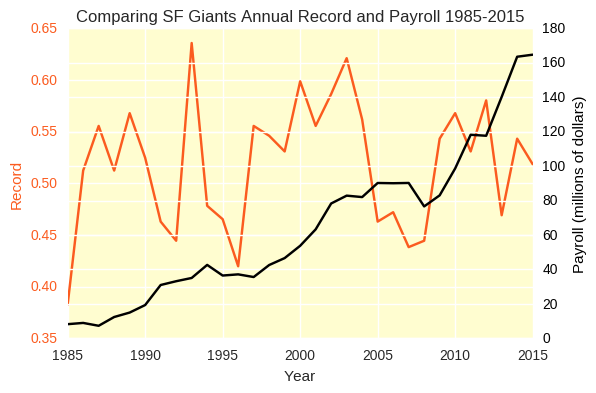

In [178]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFDD0'

"""http://matplotlib.org/examples/api/two_scales.html
http://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
http://teamcolorcodes.com/san-francisco-giants-color-codes/"""



fig, ax1 = plt.subplots()

x = range(1985, 2016)
y1 = SFN_record_since_1985
ax1.plot(x, y1, '#FB5B1F')
ax1.set_xlabel('Year')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Record', color='#FB5B1F')
for tl in ax1.get_yticklabels():
    tl.set_color('#FB5B1F')


ax2 = ax1.twinx()
y2 = (SFN_payroll_by_year / 1000000)
ax2.plot(x, y2, 'k')
ax2.set_ylabel('Payroll (millions of dollars)', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.title('Comparing SF Giants Annual Record and Payroll 1985-2015')
plt.show()

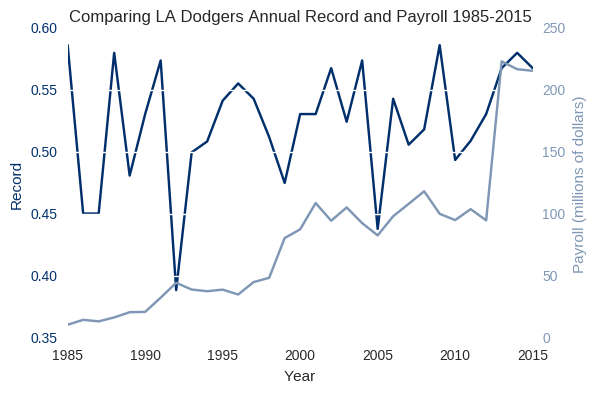

In [181]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFFFF'

"""http://matplotlib.org/examples/api/two_scales.html
http://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
http://teamcolorcodes.com/los-angeles-dodgers-color-codes/
http://www.color-hex.com/color/002f6c"""



fig, ax1 = plt.subplots()

x = range(1985, 2016)
y1 = LAN_record_since_1985
ax1.plot(x, y1, '#002F6C')
ax1.set_xlabel('Year')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Record', color='#002F6C')
for tl in ax1.get_yticklabels():
    tl.set_color('#002F6C')


ax2 = ax1.twinx()
y2 = (LAN_payroll_by_year / 1000000)
ax2.plot(x, y2, '#7f97b5')
ax2.set_ylabel('Payroll (millions of dollars)', color='#7f97b5')
for tl in ax2.get_yticklabels():
    tl.set_color('#7f97b5')
plt.title('Comparing LA Dodgers Annual Record and Payroll 1985-2015')
plt.show()

### number of SFG players in All Star Game since moving to SF

In [190]:
allstar_df = pd.read_csv('baseball/core/AllstarFull.csv')

In [191]:
giants_allstar_appearances = allstar_df[allstar_df.teamID == 'SFN']

In [193]:
giants_allstar_appearances_by_year = giants_allstar_appearances.groupby('yearID').count()

(0, 10)

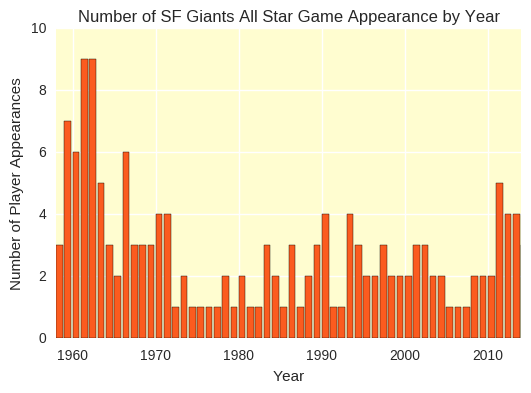

In [219]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFDD0'
%matplotlib inline

x = range(1958,2015)
y = giants_allstar_appearances_by_year['playerID']

plt.bar(x, y, color = '#FB5B1F', label='AL Average Runs')

plt.title('Number of SF Giants All Star Game Appearance by Year')
plt.xlabel('Year')
plt.ylabel('Number of Player Appearances')
plt.xlim(1958, 2014)
plt.ylim(0, 10)